In [2]:
import os
import pandas as pd
import numpy as np
from glob import glob
import gspread
import h3
from tqdm import tqdm
# from fcmeans import FCM
import matplotlib.pyplot as plt
from sklearn import manifold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import NMF
from sklearn.metrics import silhouette_score, silhouette_samples
import seaborn as sns
# import kmean
from sklearn.cluster import KMeans
from scipy.spatial import distance
import os

In [5]:
# load tsne data
DATA_FOLDER = "/group/geog_pyloo/08_GSV/data/_curated/c_seg_hex"

GRAPHIC_PATH = "/group/geog_pyloo/08_GSV/_graphic/cluster/allcities"
if not os.path.exists(GRAPHIC_PATH):
    os.makedirs(GRAPHIC_PATH)
res = 9

FILENAME = "c_seg_cat=31_res={res}_tsne.parquet"
df = pd.read_parquet(os.path.join(DATA_FOLDER, FILENAME.format(res = res)))
FILENAME_ORI = "c_seg_cat=31_res={res}.parquet"
df_ori = pd.read_parquet(os.path.join(DATA_FOLDER, FILENAME_ORI.format(res = res)))

In [7]:
def plot_wss_kmean(data, N, comment):
    """Try Kmean instead"""
    wss = []
    distorsions = []
    for i in range(2,N):
        print("cluster: ", i)
        # fcm_vol = FCM(n_clusters=i, random_state=0)
        km = KMeans(n_clusters=i, random_state=0)
        km.fit(data)
        wss.append(km.inertia_)
        distorsions.append(sum(np.min(distance.cdist(data,
        km.cluster_centers_, 'euclidean'),axis=1)) /
        data.shape[0])
        
    sns.set(style="whitegrid")
    sns.set_context("paper", rc={"font.size":10,"axes.titlesize":12,"axes.labelsize":12})

    plt.figure(figsize=(6,4))
    plt.plot(range(2,N), wss, 'bx-', color='black')
    # plt.grid(True,alpha=.3)
    # plt.legend(framealpha=.3)
    plt.xlabel('Number of clusters $c$')
    plt.ylabel('Inertia')
    plt.title('The Elbow Method showing the optimal $c$')
    plt.savefig(os.path.join(GRAPHIC_PATH,f"elbow_volume_{N}_{comment}.png"), dpi=200, bbox_inches = 'tight')
    plt.show()
    return wss, distorsions

cluster:  2
cluster:  3
cluster:  4
cluster:  5
cluster:  6
cluster:  7
cluster:  8
cluster:  9
cluster:  10
cluster:  11
cluster:  12
cluster:  13
cluster:  14
cluster:  15
cluster:  16
cluster:  17
cluster:  18
cluster:  19
cluster:  20
cluster:  21
cluster:  22
cluster:  23
cluster:  24
cluster:  25
cluster:  26
cluster:  27
cluster:  28
cluster:  29


/tmp/ipykernel_3483234/2928015886.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(2,N), wss, 'bx-', color='black')


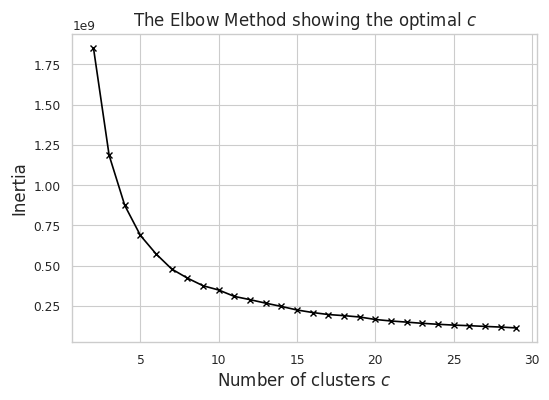

In [8]:
data = df[['tsne_1', 'tsne_2']].copy()
wss, distorsions = plot_wss_kmean(data, 30, "tsne-2d")

/tmp/ipykernel_3483234/3081908225.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(2,30), distorsions, 'bx-', color='black')


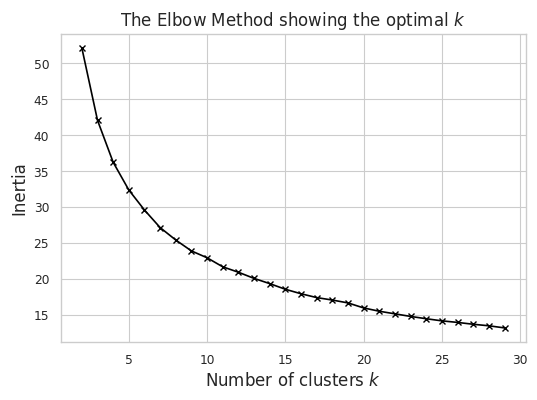

In [10]:
plt.figure(figsize=(6,4))
plt.plot(range(2,30), distorsions, 'bx-', color='black')
# plt.grid(True,alpha=.3)
# plt.legend(framealpha=.3)
plt.xlabel('Number of clusters $k$')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal $k$')
plt.savefig(os.path.join(GRAPHIC_PATH,f"elbow_volume_30_tsn-distorsion.png"), dpi=200, bbox_inches = 'tight')
plt.show()

In [11]:
N = 9
km = KMeans(n_clusters=N, random_state=0)
km.fit(data)
df[f'cluster_{N}'] = km.labels_
df_ori[f'cluster_{N}'] = km.labels_

In [12]:
df.to_csv(os.path.join(DATA_FOLDER, "c_seg_cat=31_res={res}_tsne_cluster={n}.csv".format(res = res, n = N)), index=False)

In [13]:
variables_sel_top1 = [
    'bike', 
             'building', 
             'bus', 
             'car',
       'grass', 
       'house', 
       'installation', 
       'lake+waterboday', 
       'light',
       'mountain+hill', 
       'person', 
       'pole', 
       'railing', 
       'road',
       'shrub', 
       'sidewalk', 
       'signage', 
       'sky',  
       'sportsfield',
       'table+chair', 
       'tower', 
       'traffic light', 
       'trashcan', 
       'tree', 
       'truck',
       'van', 
       'wall',
       'skyscraper',
       'window'
       ]

variable_mapping_2 = dict(zip(
       ['bike', 
             'building', 
             'bus', 
             'car',
       'grass', 
       'house', 
       'installation', 
       'lake+waterboday', 
       'light',
       'mountain+hill', 
       'person', 
       'pole', 
       'railing', 
       'road',
       'shrub', 
       'sidewalk', 
       'signage', 
       'sky',  
       'sportsfield',
       'table+chair', 
       'tower', 
       'traffic light', 
       'trashcan', 
       'tree', 
       'truck',
       'van', 
       'wall',
       'ground',
       'other',
       'skyscraper',
       'window'],
       ['bike', 
             'building', 
             'bus', 
             'car',
       'grass', 
       'house', 
       'furniture', 
       'nature', 
       'furniture', 
       'nature',  
       'person', 
       'furniture', 
       'railing', 
       'road',
       'shrub', 
       'sidewalk', 
       'signage', 
       'sky',  
       'sportsfield',
       'furniture', 
       'tower', 
       'furniture', 
       'furniture', 
       'tree', 
       'truck',
       'van', 
       'wall',
       'other',
       'other',
       'skyscraper',
       'building',])
)

In [14]:
variables_sel_top2 = [
    'bike',
 'bus',
 'car',
 'house',
 'person',
 'railing',
 'road',
 'sidewalk',
 'truck',
 'van']

In [15]:
variables_sel_top1_order = [
    'skyscraper',
    'building',
    'house',
    'wall',
    'window',
    'road',
    'sidewalk',
    'traffic light',
    'trashcan',
    'railing',
    'light',
    'pole',
    'table+chair',
    'signage',
    'installation', 
    'sportsfield',
    'bike',
    'person',
    'bus',
    'truck',
    'van',
    'car',
    'grass',
    'shrub', 
    'tree',
    'lake+waterboday',
    'mountain+hill',
    'sky'
]

In [16]:
# summarize the cluster type
df_summary = df_ori[variables_sel_top1_order+[f"cluster_{N}"]].groupby(f"cluster_{N}").mean().stack().reset_index()\
.rename(columns = {"level_1":"variable", 0:"std_value"})


df_summary_update = []
for v in df_summary["category"].unique():
    temp = df_summary[df_summary["category"]==v].reset_index(drop = True)
    temp["norm_value"] = (temp["std_value"] - temp["std_value"].min())/(temp["std_value"].max() - temp["std_value"].min())
    df_summary_update.append(temp)
    
df_summary_update = pd.concat(df_summary_update).reset_index()

In [17]:
df_heat = df_summary_update.pivot(
    columns= "category", values = "norm_value", index = f"cluster_{N}"
)[variables_sel_top1_order]

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5]),
 [Text(0.5, 1, 'skyscraper'),
  Text(1.5, 1, 'building'),
  Text(2.5, 1, 'house'),
  Text(3.5, 1, 'wall'),
  Text(4.5, 1, 'window'),
  Text(5.5, 1, 'road'),
  Text(6.5, 1, 'sidewalk'),
  Text(7.5, 1, 'traffic light'),
  Text(8.5, 1, 'trashcan'),
  Text(9.5, 1, 'railing'),
  Text(10.5, 1, 'light'),
  Text(11.5, 1, 'pole'),
  Text(12.5, 1, 'table+chair'),
  Text(13.5, 1, 'signage'),
  Text(14.5, 1, 'installation'),
  Text(15.5, 1, 'sportsfield'),
  Text(16.5, 1, 'bike'),
  Text(17.5, 1, 'person'),
  Text(18.5, 1, 'bus'),
  Text(19.5, 1, 'truck'),
  Text(20.5, 1, 'van'),
  Text(21.5, 1, 'car'),
  Text(22.5, 1, 'grass'),
  Text(23.5, 1, 'shrub'),
  Text(24.5, 1, 'tree'),
  Text(25.5, 1, 'lake+waterboday'),
  Text(26.5, 1, 'mountain+hill'),
  Text(27.5, 1, 'sky')])

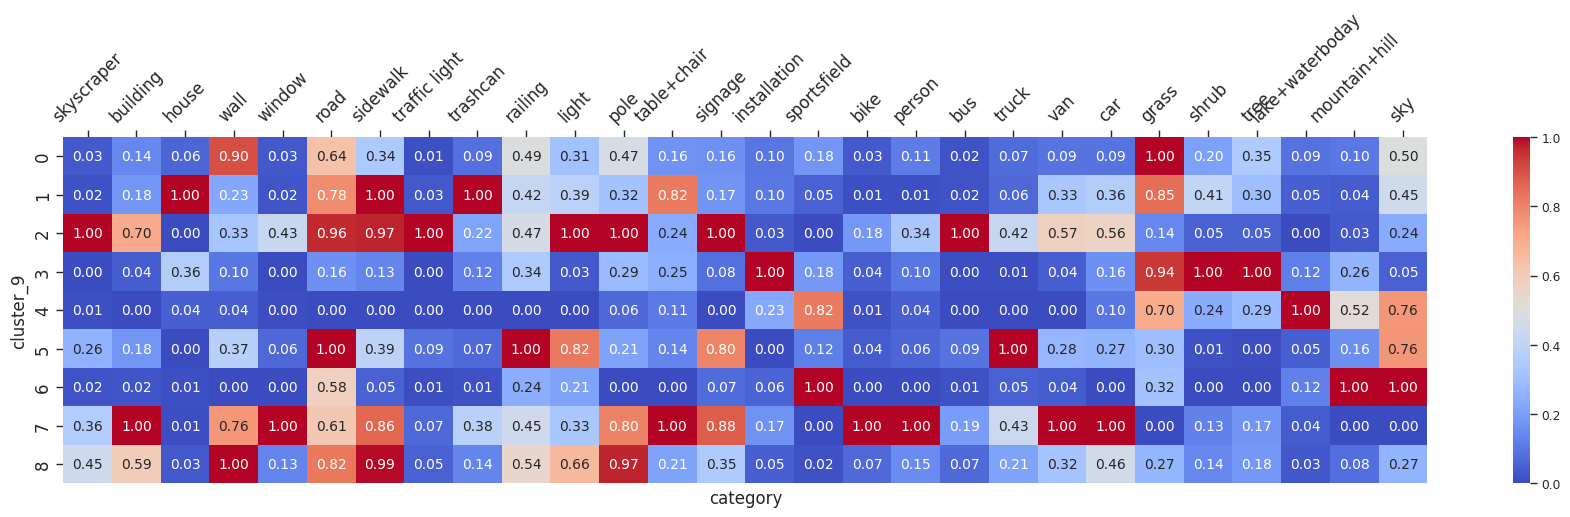

In [18]:
# use heatmap to visualize the cluster
fig, ax = plt.subplots(figsize = (22,4.5))
# use a gradient color
sns.heatmap(df_heat, cmap = "coolwarm", annot = True, fmt=".2f", 
            ax = ax)
# show axis annotation larger
ax.tick_params(axis='both', which='major', labelsize=12)
# show ticks to the left
ax.yaxis.tick_left()
# show ticks to the bottom
ax.xaxis.tick_top()
# rotate the x axis
plt.xticks(rotation=45)


In [21]:
# use the husl color to map to each cluster
import seaborn as sns
color_palette = sns.color_palette("husl", N)
color_dict = dict(zip(range(N), color_palette))
color_dict

{0: (0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 1: (0.8369430560927636, 0.5495828952802333, 0.1952683223448124),
 2: (0.6430915736746491, 0.6271955086583126, 0.19381135329796756),
 3: (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 4: (0.20582072623426667, 0.6842209016721068, 0.5675558225732941),
 5: (0.2151139535594307, 0.6700707833028816, 0.7112365203426209),
 6: (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 7: (0.731751635642941, 0.5128186367840487, 0.9581005178234921),
 8: (0.9614880299080136, 0.3909885385134758, 0.8298287106954371)}

In [28]:
# visualize one city
# get the geometry
from shapely.geometry import Polygon
import geopandas as gpd

def cell_to_shapely(cell):
    coords = h3.h3_to_geo_boundary(cell)
    flipped = tuple(coord[::-1] for coord in coords)
    return Polygon(flipped)


# loop through all cities and save the graphic and data
def get_result(city, N = N):
    cityabbr = city.lower().replace(" ", "")
    sample = df[df["city_lower"]==cityabbr].reset_index(drop = True)
    h3_geoms = sample['hex_id'].apply(lambda x: cell_to_shapely(x))
    df_sel_gdf = gpd.GeoDataFrame(sample[['hex_id',f"cluster_{N}"]], geometry = h3_geoms)
    df_sel_gdf.crs = "EPSG:4326"
    df_sel_gdf[f"cluster_{N}"] = df_sel_gdf[f"cluster_{N}"].astype(str)
    # use the color palette to map the cluster consistently
    fig, ax = plt.subplots(figsize = (8,8))
    for c in range(N):
        df_sel_gdf[df_sel_gdf[f"cluster_{N}"]==str(c)].plot(ax = ax, 
                                                            color = color_dict[c], 
                                                            linewidth = 0.1,
                                                            label = f"cluster_{c}",
                                                            legend = True)

    plt.title(city)
    # add the legend
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.savefig(os.path.join(GRAPHIC_PATH, f"{city}_cluster={N}-tsn-res=9.png"), dpi=200, bbox_inches = 'tight')
    exportfolder = os.path.join(GRAPHIC_PATH, "allcity")
    if not os.path.exists(exportfolder):
        os.makedirs(exportfolder)
    # df_sel_gdf.to_file(os.path.join(exportfolder,f"{city}_cluster={N}-tsn-res=9.geojson"), driver = "GeoJSON")
    return df_sel_gdf

In [32]:
fullcity = df["city_lower"].unique().tolist()
fullcity.index("gaborone")

35

In [33]:
allgdf = []
for city in df["city_lower"].unique()[36:]:
    try:
        df_sel_gdf = get_result(city)
        allgdf.append(df_sel_gdf)
    except:
        print(f"Error in {city}")
# allgdf = pd.concat(allgdf).reset_index(drop = True)

/tmp/ipykernel_3483234/2724404797.py:31: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
/tmp/ipykernel_3483234/2724404797.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
/tmp/ipykernel_3483234/2724404797.py:31: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
/tmp/ipykernel_3483234/2724404797.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignore

Error in guatemalacity


/tmp/ipykernel_3483234/2724404797.py:31: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
/tmp/ipykernel_3483234/2724404797.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
/tmp/ipykernel_3483234/2724404797.py:31: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
/tmp/ipykernel_3483234/2724404797.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignore

<AxesSubplot:>

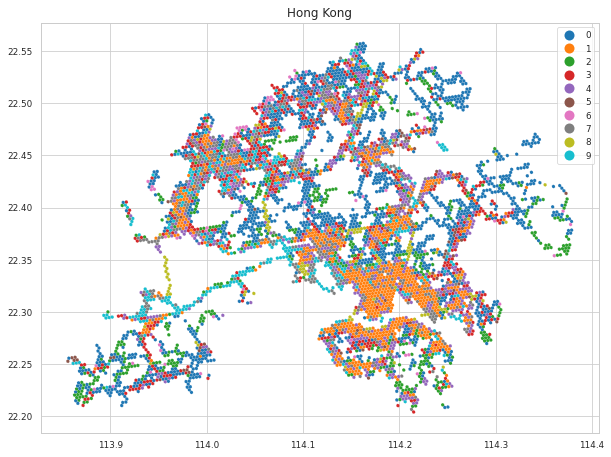

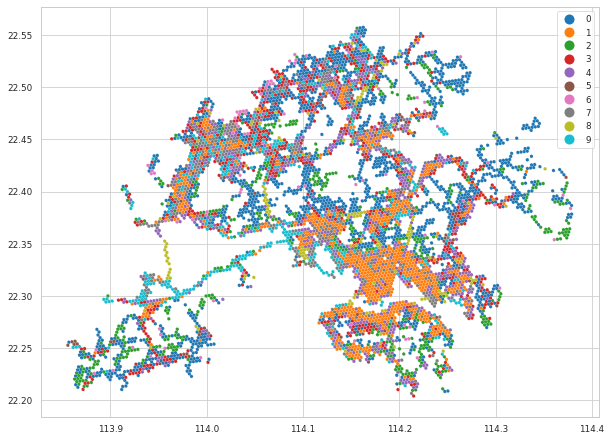

In [147]:
df_sel_gdf = get_result("Hong Kong", N = N)
# df_sel_gdf.plot(figsize = (10,10), column = f"cluster_{N}", legend = True, linewidth = 0.1)

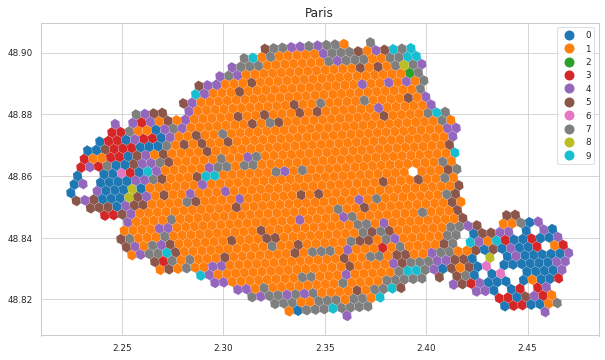

In [148]:
df_sel_gdf = get_result("Paris", N = N)

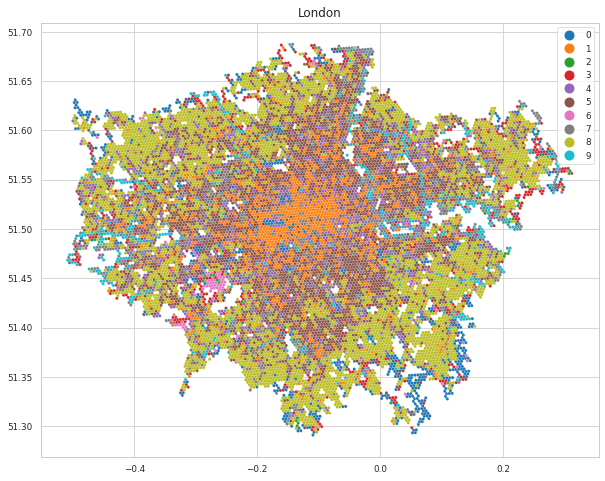

In [149]:
df_sel_gdf = get_result("London", N = N)

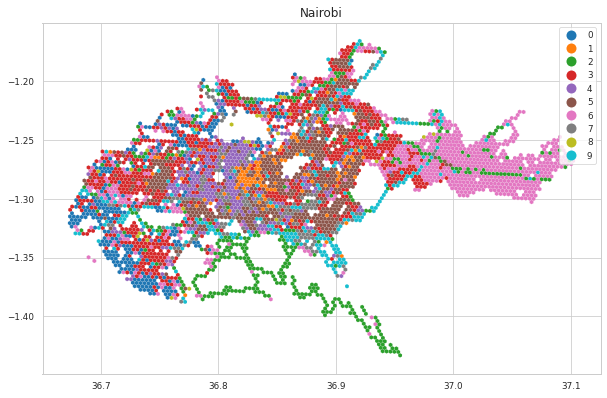

In [150]:
df_sel_gdf = get_result("Nairobi", N = N)

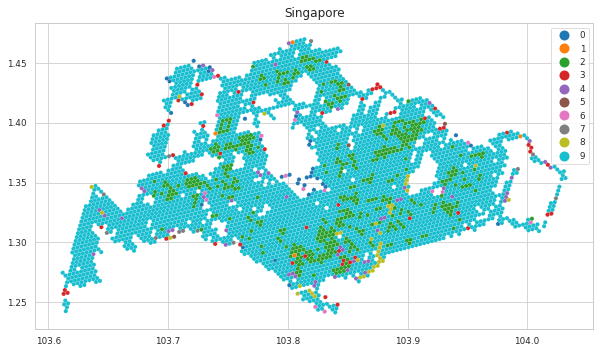

In [155]:
df_sel_gdf = get_result("Singapore", N = N)

In [167]:
# check why singapore is so generic
df_ori[df_ori['city_lower']=='singapore'][['building', 'bus','person','sky', 'tree','skyscraper','road','car']].describe()

category,building,bus,person,sky,tree,skyscraper,road,car
count,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000
mean,17345.663092,20.480139,3.071528,84339.276267,32611.702785,4.261609,16231.872569,83.691838
std,16529.661032,130.067147,16.005339,24819.768104,12511.285637,34.116143,10267.126090,461.764016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4199.778910,0.000000,0.000000,67515.847005,24635.270064,0.000000,9242.453495,0.312500
50%,11961.848925,0.000000,0.000000,85604.801096,31433.277344,0.000000,15086.359138,8.973909
75%,26555.488542,0.000000,1.161983,102551.657812,39189.175000,0.000000,21451.951705,65.817746
max,88751.650000,4297.750000,421.500000,148601.891667,120390.250000,1197.450000,67352.750000,23676.250000


In [168]:
df_ori[df_ori['city_lower']=='hongkong'][['building', 'bus','person','sky', 'tree','skyscraper','road','car']].describe()

category,building,bus,person,sky,tree,skyscraper,road,car
count,5460.000000,5460.000000,5460.000000,5460.000000,5460.000000,5460.000000,5460.000000,5460.000000
mean,13859.757562,314.372191,92.851398,33576.354762,33980.868773,227.151463,29347.151542,1111.751665
std,16347.484704,784.069515,230.489761,17000.337491,23213.197603,736.127767,19012.295323,1664.664829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,910.933594,0.000000,1.299219,21004.560417,15688.700000,0.000000,11462.512500,7.236111
50%,7509.276882,1.894518,21.433036,32181.516667,30105.818548,0.000000,34718.774479,533.803274
75%,21381.420833,229.283333,85.062076,44299.407585,49438.088160,0.000000,45344.600000,1561.096354
max,97430.136364,12752.091667,6747.500000,160000.000000,130680.500000,12283.566667,67909.400000,30555.500000


In [169]:
df[df['city_lower']=='london'].describe()

,img_count,res,tsne_1,tsne_2,cluster,cluster_10
count,14298.000000,14298.0,14298.000000,14298.000000,14298.000000,14298.000000
mean,106.651000,9.0,35.125217,23.876509,3.140369,5.555113
std,30.480182,0.0,37.190033,45.723354,1.785349,2.640062
min,4.000000,9.0,-115.825493,-111.380814,0.000000,0.000000
25%,116.000000,9.0,18.003059,-0.422649,2.000000,4.000000
50%,120.000000,9.0,34.228785,31.991184,2.000000,5.000000
75%,120.000000,9.0,65.075006,61.107053,4.000000,8.000000
max,120.000000,9.0,112.050156,105.480110,6.000000,9.000000


In [163]:
df[df['city_lower']=='singapore'].describe()

,img_count,res,tsne_1,tsne_2,cluster,cluster_10
count,3832.000000,3832.0,3832.000000,3832.000000,3832.000000,3832.000000
mean,109.516180,9.0,-41.691410,-90.312714,3.316023,7.859603
std,37.211695,0.0,13.538356,32.150372,0.973185,2.545050
min,4.000000,9.0,-89.708214,-104.780716,0.000000,0.000000
25%,120.000000,9.0,-47.799229,-100.231884,3.000000,9.000000
50%,124.000000,9.0,-43.228914,-97.784687,3.000000,9.000000
75%,128.000000,9.0,-39.568940,-94.610533,3.000000,9.000000
max,152.000000,9.0,109.679886,107.089630,6.000000,9.000000


In [164]:
df[df['city_lower']=='hongkong'].describe()

,img_count,res,tsne_1,tsne_2,cluster,cluster_10
count,5460.000000,5460.0,5460.000000,5460.000000,5460.000000,5460.000000
mean,87.576007,9.0,-7.333663,-1.034278,2.807326,2.982051
std,44.376248,0.0,58.742805,49.932640,2.314735,2.994232
min,4.000000,9.0,-109.072701,-121.002403,0.000000,0.000000
25%,48.000000,9.0,-57.169672,-44.435439,1.000000,0.000000
50%,120.000000,9.0,-14.096367,7.287914,3.000000,2.000000
75%,120.000000,9.0,30.255333,45.254390,5.000000,4.000000
max,144.000000,9.0,113.520309,110.369377,6.000000,9.000000


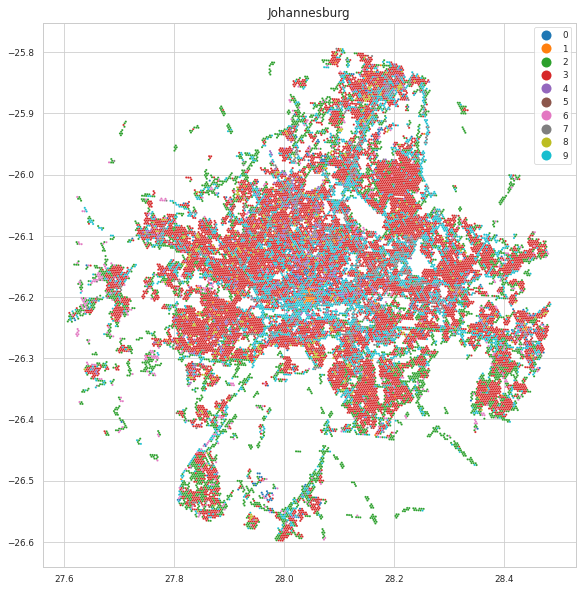

In [154]:
df_sel_gdf = get_result("Johannesburg", N = N)

## 2. Summarize the results across cities

In [130]:
df_summary= pd.read_csv(os.path.join(DATA_FOLDER, "allcity_cluster=7-tsn-res=9.csv")).groupby(["city_lower","cluster"])\
    .size().reset_index().rename(columns = {0:"count"}).pivot(
    columns = "cluster", values = "count", index = "city_lower").fillna(0)
df_summary['total'] = df_summary.sum(axis = 1)
df_summary_prop = df_summary.copy()
for i in range(N):
    df_summary_prop[i] = df_summary_prop[i]/df_summary_prop['total']
df_summary_prop.to_csv(os.path.join(DATA_FOLDER, "allcity_cluster=7-tsn-res=9_city-level_summary.csv"))
df_summary_prop.sort_values(6, ascending = False).head(40)

cluster,0,1,2,3,4,5,6,total
city_lower,,,,,,,,
bogotá,0.014844,0.109967,0.018479,0.017267,0.008179,0.067858,0.763405,3301.0
seoul,0.008216,0.116290,0.037447,0.005530,0.016116,0.114236,0.702165,6329.0
tokyo,0.010837,0.166559,0.023481,0.001935,0.016256,0.096375,0.684557,7751.0
paris,0.076014,0.071791,0.146115,0.000845,0.009291,0.030405,0.665541,1184.0
santiago,0.020761,0.100346,0.211073,0.000000,0.003460,0.051903,0.612457,289.0
nagoya,0.009637,0.267070,0.003029,0.022577,0.007985,0.115088,0.574615,3632.0
riodejaneiro,0.055588,0.201397,0.066065,0.016589,0.023865,0.093423,0.543073,3436.0
telaviv,0.025000,0.077273,0.247727,0.020455,0.020455,0.070455,0.538636,440.0
belohorizonte,0.015140,0.349735,0.042392,0.031037,0.001893,0.048070,0.511734,2642.0


In [131]:
df_summary_prop.to_csv(os.path.join(DATA_FOLDER, "allcity_cluster=7-tsn-res=9_city-level_summary.csv"))